In [1]:
# Problem 3

In [2]:
# Import Libs
import numpy as np
import pandas as pd
import os as os
import math as math
import matplotlib.pyplot as plt

from IPython.display import display, HTML

In [3]:
# Read Data
cwd = os.getcwd()
X_train = pd.read_csv(cwd + "\X_train.csv", header = None).values
y_train = pd.read_csv(cwd + "\y_train.csv", header = None).values
X_test = pd.read_csv(cwd + "\X_test.csv", header = None).values
y_test = pd.read_csv(cwd + "\y_test.csv", header = None).values

In [4]:
# Problem 3.1
# Class for Gaussian Process
class Gaussian_Process:
    def __init__(self,X_train,y_train, sigma2, b):
        # Train Data
        self.X_train = X_train
        self.y_train = y_train
        # Variance σ^2
        self.sigma2 = sigma2
        # Kernel Width b
        self.b = b
        # Kernel Matrix K_n
        # self.Kn = self.ComputeKn()
        self.Kn = []
        
    def Kernel(self,xi,xj):
        # Compute K(xi,xj)
        return math.exp((-1 / self.b) * np.sum((xi -xj)**2))
    
    def ComputeKn(self):
        # Calculate K_n given train data set X
        temp_K = []
        for i in self.X_train:
            temp = []
            for j in self.X_train:
                temp.append(self.Kernel(i,j))
            #Endfor
            temp_K.append(temp)
        #Endfor
        
        # Update K_n
        self.Kn = np.asarray(temp_K)
        
    def Predict(self,x0):
        
        # Compute K(x0,D)
        temp = []
        for j in self.X_train:
            temp.append(self.Kernel(x0,j))
        #Endfor
        K_xD = np.asarray(temp)
        
        # Compute σ^2*I
        sigma2I = self.sigma2 * np.identity(self.Kn.shape[0])
        
        # Compute K(x0,D)*(σ^2*I + Kn)^-1
        K_SigKn_Inverse = np.matmul(K_xD, np.linalg.inv(sigma2I + self.Kn))
        
        # µ = K(x0,D)*(σ^2*I + Kn)^-1 * y
        mean = (np.matmul(K_SigKn_Inverse, self.y_train))[0]
        
        # σ0^2 = σ^2 + K(x0,x0) - K(x0,D)*(σ^2*I + Kn)^-1 * K(x0,D)^T
        variance = self.sigma2 + self.Kernel(x0,x0) + np.matmul(K_SigKn_Inverse, np.transpose(K_xD))
        
        return [mean,variance]

In [5]:
# Problem 3.2
# It is convenient to write a RMSE fucntion for lists

def RMSE(y_predicted,y_test):
    # Arrayfy
    y_predicted = np.array(y_predicted)
    y_test = np.array(y_test)
    return np.sqrt(np.mean(np.square(y_predicted - y_test)))

In [6]:
# Init Question Variable
b_list = [5, 7, 9, 11, 13, 15]
sigma2_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [7]:
# Init
RMSE_list = [] # len(b_list) * len(sigma2_list) matrix
y_test = [i[0] for i in y_test] # Reshape

for b in b_list:
    
    RMSE_list_temp = [] 
    
    for sigma2 in sigma2_list:
        
        # Init Gaussian
        Gaussian = Gaussian_Process(X_train, y_train, sigma2 = sigma2, b = b)
        Gaussian.ComputeKn() # Weird exception if called in constructor
        # Buffer
        y_predicted = []
        
        for i in X_test:
            y_predicted.append(Gaussian.Predict(i)[0]) # Only need mean here, as stated in question
        #Endfor
        
        RMSE_list_temp.append(RMSE(y_predicted,y_test))
     
    #Endfor   
    
    RMSE_list.append(RMSE_list_temp)

#Endfor

In [8]:
# Display RMSE Table
PD_RMSE = pd.DataFrame(RMSE_list, columns = pd.Index(sigma2_list, name = "b\σ^2"), index = b_list)
display(PD_RMSE)

b\σ^2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
5,1.966277,1.933137,1.923422,1.922199,1.924771,1.929215,1.934636,1.940585,1.946822,1.953215
7,1.920164,1.904878,1.908082,1.915904,1.924806,1.933704,1.942256,1.950382,1.958095,1.965440
9,1.897650,1.902521,1.917650,1.932517,1.945702,1.957237,1.967406,1.976494,1.984743,1.992344
11,1.890509,1.914983,1.938851,1.957939,1.973218,1.985767,1.996378,2.005606,2.013838,2.021347
13,1.895850,1.935588,1.964600,1.985504,2.001317,2.013881,2.024313,2.033309,2.041320,2.048644
15,1.909605,1.959551,1.990806,2.011918,2.027373,2.039467,2.049466,2.058107,2.065847,2.072978


In [9]:
# Find min
cur_min = RMSE_list[0][0]
for rmserow in RMSE_list:
    for rmse in rmserow:
        if(rmse < cur_min):
            cur_min = rmse
            
display(cur_min)

1.8905087802491962

In [10]:
# Problem 3.4

# Read Data
cwd = os.getcwd()
X_train = pd.read_csv(cwd + "\X_train.csv", header = None).values
y_train = pd.read_csv(cwd + "\y_train.csv", header = None).values
X_test = pd.read_csv(cwd + "\X_test.csv", header = None).values
y_test = pd.read_csv(cwd + "\y_test.csv", header = None).values

# Init train data, test data, sigma2 and b specific to this problem
X_train_carweight = X_train[:,3]
X_test_carweight = X_test[:,3]
b_carweight = 5
sigma2_carweight = 2

In [11]:
y_predicted_carweight = []

# Same Gaussian Process
Gaussian_carweight = Gaussian_Process(X_train_carweight, y_train,sigma2 = sigma2_carweight, b = b_carweight)
Gaussian_carweight.ComputeKn()

for i in X_train_carweight:
    y_predicted_carweight.append(Gaussian_carweight.Predict(i)[0])
#Endfor

In [12]:
# Reshape
y_train_array = [i[0] for i in y_train]
X_train_carweight = list(X_train_carweight)

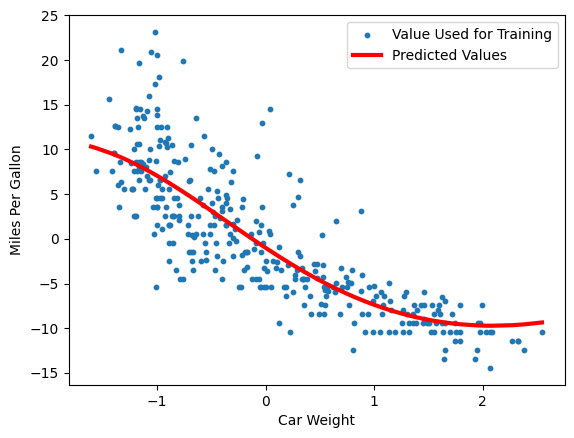

In [13]:
# Plot
# Sort predicted mile per gallon in corresponding carweight
scatter_y = [i for i,_ in sorted(zip(y_predicted_carweight, X_train_carweight), key = lambda pair: pair[1])]

plt.figure()
plt.scatter(X_train_carweight, y_train, label = "Value Used for Training", s = 10)
plt.plot(sorted(X_train_carweight), scatter_y, color = "red", linewidth = 3.0, label = "Predicted Values")
plt.xlabel("Car Weight")
plt.ylabel("Miles Per Gallon")
plt.legend()
plt.show()